In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_data = r"healthcare-dataset-stroke-data.csv"
df = pd.read_csv(csv_data)
df.head(5)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\User\AppData\Local\Temp\ipykernel_26504\964876097.py:4: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


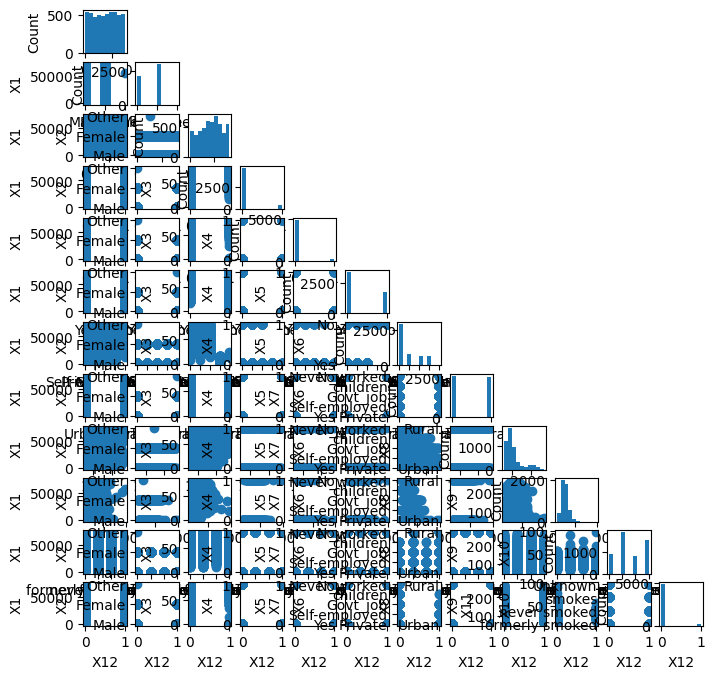

In [65]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(df.values)
plt.tight_layout()
plt.show()

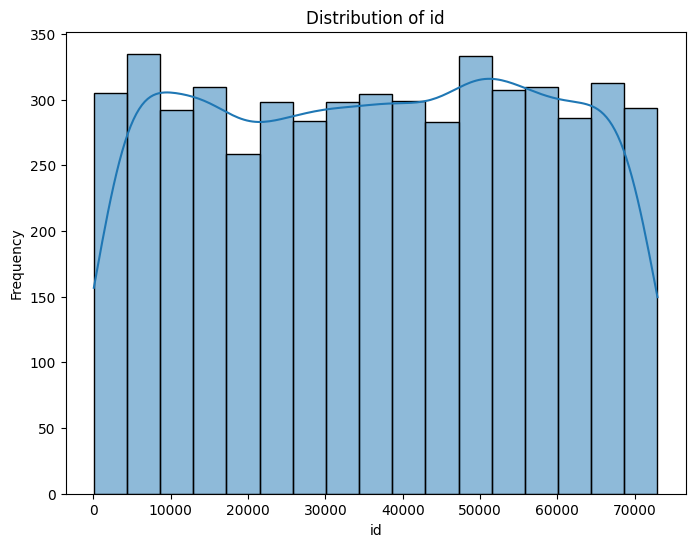

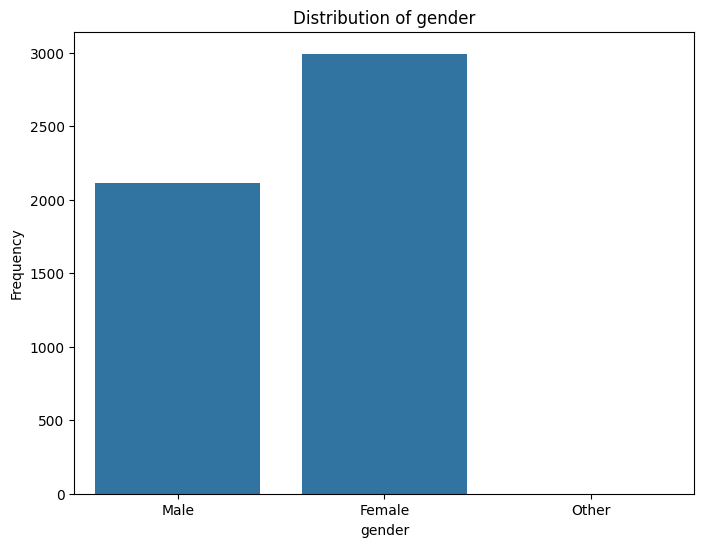

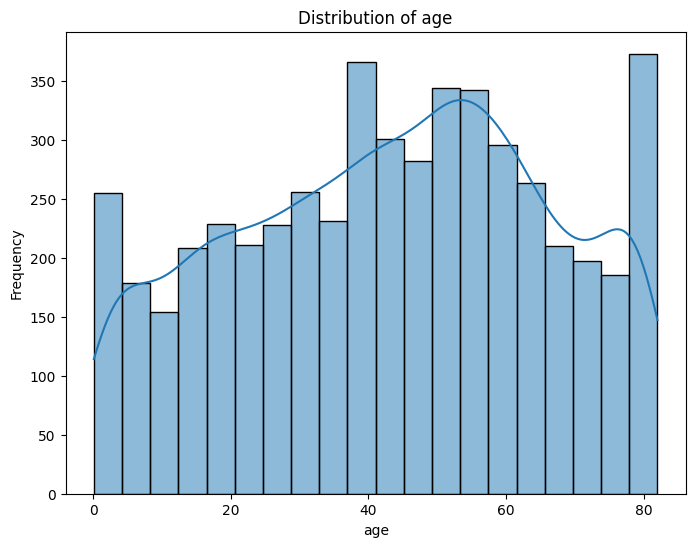

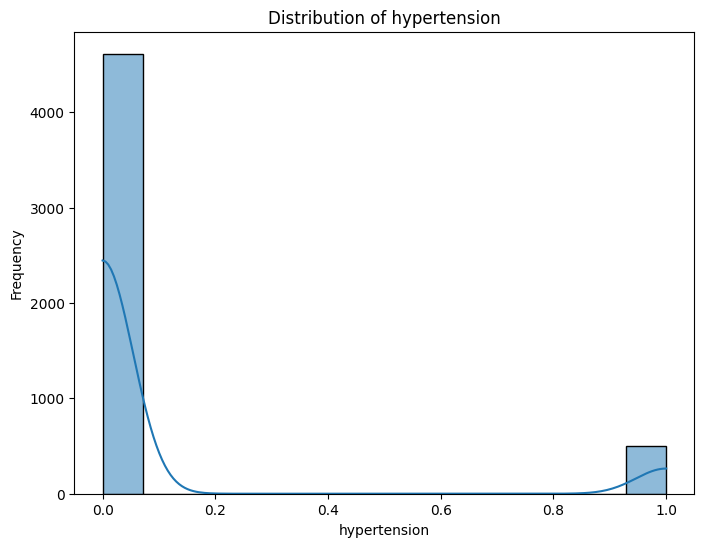

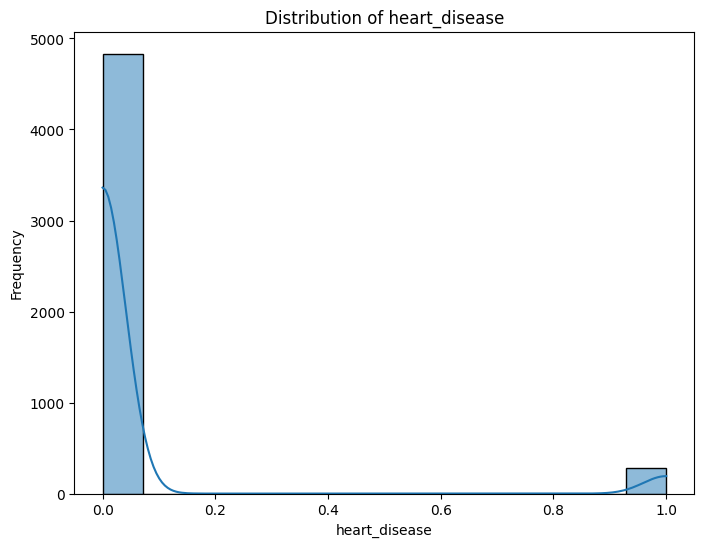

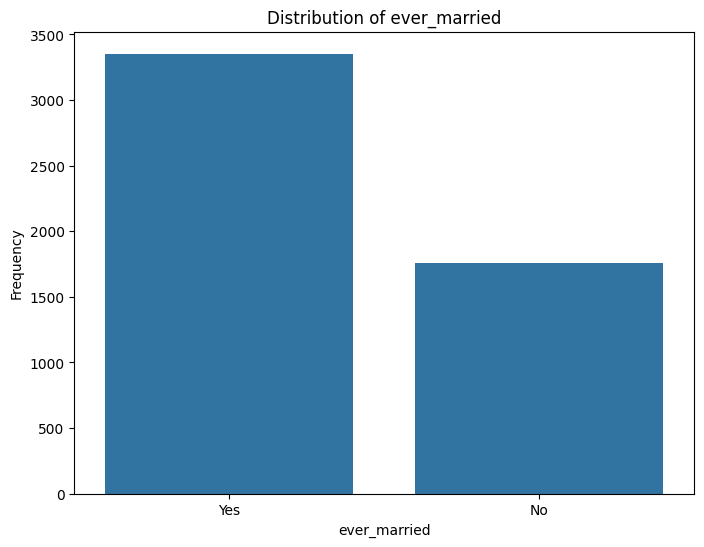

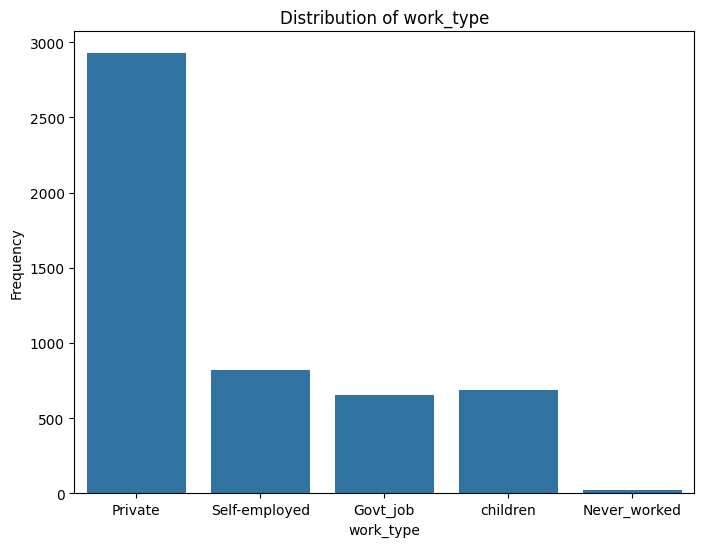

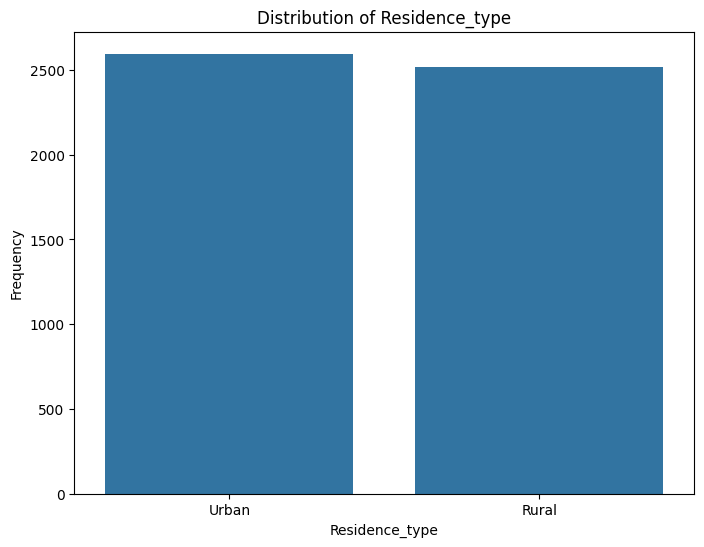

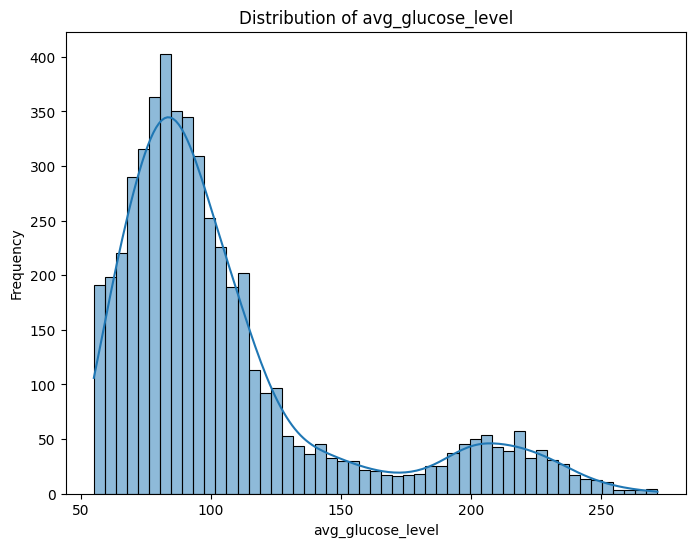

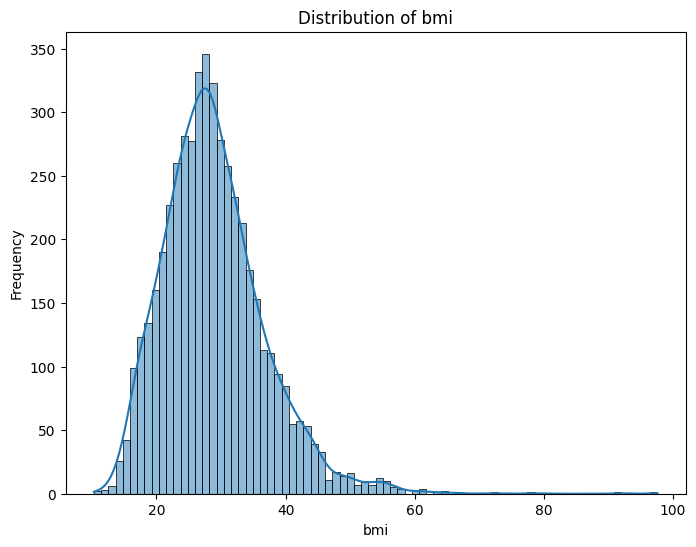

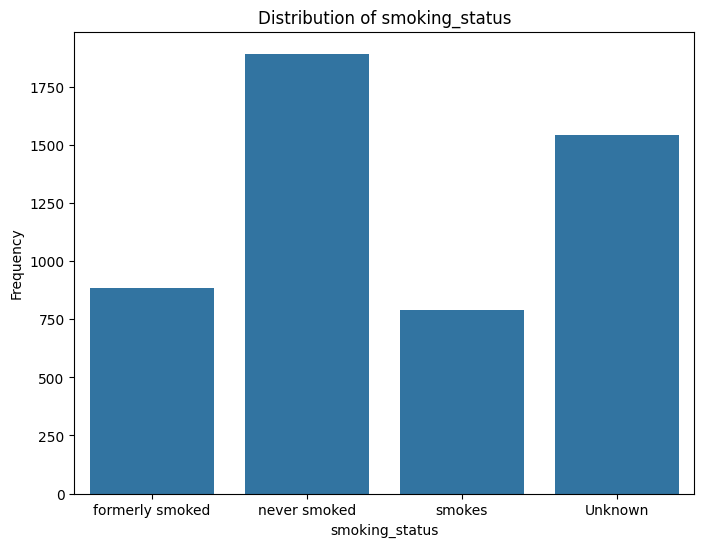

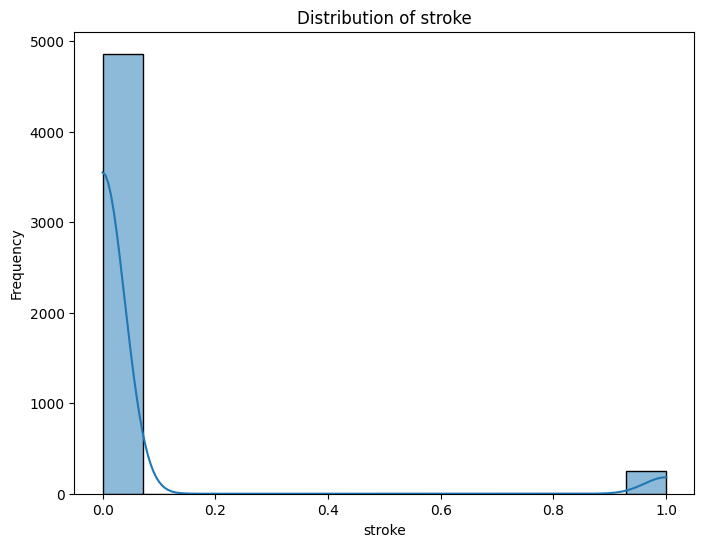

In [66]:
import seaborn as sns

for column in df.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    if df[column].dtype in ['int64', 'float64']:  # Numerical columns
        sns.histplot(df[column], kde=True)  # Histogram with KDE
        plt.title(f'Distribution of {column}')
    else:  # Categorical columns
        sns.countplot(x=column, data=df)  # Countplot
        plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [67]:
df['gender'] = df['gender'].apply(lambda x: x if x in ['female', 'male'] else 'unknown')
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
print(df)

         id   gender   age  hypertension  heart_disease ever_married  \
0      9046  unknown  67.0             0              1          Yes   
1     51676  unknown  61.0             0              0          Yes   
2     31112  unknown  80.0             0              1          Yes   
3     60182  unknown  49.0             0              0          Yes   
4      1665  unknown  79.0             1              0          Yes   
...     ...      ...   ...           ...            ...          ...   
5105  18234  unknown  80.0             1              0          Yes   
5106  44873  unknown  81.0             0              0          Yes   
5107  19723  unknown  35.0             0              0          Yes   
5108  37544  unknown  51.0             0              0          Yes   
5109  44679  unknown  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   

In [73]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df.columns.tolist()

ohe = OneHotEncoder(categories='auto', drop='first', sparse_output=False)

c_transformer = ColumnTransformer(
    transformers=[('onehot', ohe, ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])],
    remainder='passthrough' 
)

X = c_transformer.fit_transform(df)
print("Transformed shape:", X.shape)
print(X[:5]) 

Transformed shape: (5110, 16)
[[1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 9.04600000e+03 6.70000000e+01 0.00000000e+00
  1.00000000e+00 2.28690000e+02 3.66000000e+01 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 5.16760000e+04 6.10000000e+01 0.00000000e+00
  0.00000000e+00 2.02210000e+02 2.88932369e+01 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 3.11120000e+04 8.00000000e+01 0.00000000e+00
  1.00000000e+00 1.05920000e+02 3.25000000e+01 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 6.01820000e+04 4.90000000e+01 0.00000000e+00
  0.00000000e+00 1.71230000e+02 3.440

In [74]:
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [75]:
from sklearn.model_selection import train_test_split

y = df['stroke']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)


print("Full dataset shape:", X.shape, y.shape) 
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Full dataset shape: (5110, 16) (5110,)
Training data shape: (3577, 16)
Test data shape: (1533, 16)


In [76]:
from sklearn.preprocessing import StandardScaler

num_categorical_features = ohe.fit_transform(df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]).shape[1]

X_train = np.array(X_train)
X_test = np.array(X_test)

X_train_numeric = X_train[:, num_categorical_features:].astype(float)
X_test_numeric = X_test[:, num_categorical_features:].astype(float)

scaler = StandardScaler()
X_train[:, num_categorical_features:] = scaler.fit_transform(X_train_numeric)
X_test[:, num_categorical_features:] = scaler.transform(X_test_numeric)

print("Scaled Training data shape:", X_train.shape)
print("Scaled Test data shape:", X_test.shape)

Scaled Training data shape: (3577, 16)
Scaled Test data shape: (1533, 16)


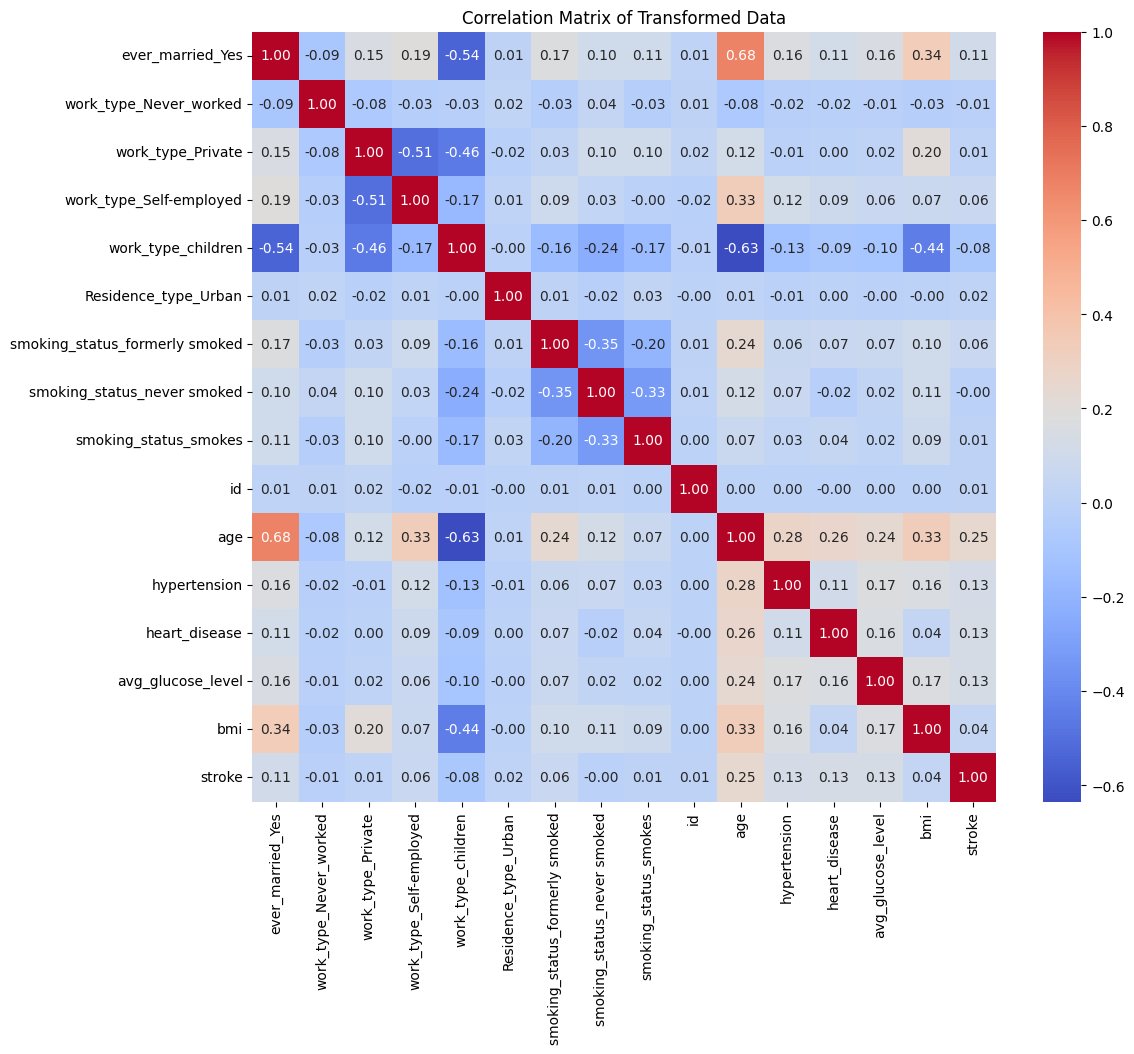

In [103]:
import seaborn as sns

ohe_columns = ohe.get_feature_names_out(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

df_column = list(ohe_columns) + [col for col in df.columns if col not in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]

df_transformed = pd.DataFrame(X, columns=df_column)

correlation_matrix = df_transformed.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Transformed Data')
plt.show()


classification에서는 perceptron, adaline (GD, SGD) , KNN, decision tree, svm등을 활용하고 각각에 대해 hyperparameter를 grid search하여 best performance 레포트 

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)  
X_test_2d = pca.transform(X_test) 


Transformed training data shape: (3577, 2)
Transformed test data shape: (1533, 2)


In [86]:
from sklearn.linear_model import Perceptron

perceptron_clf.fit(X_train_2d, y_train)

y_train_pred_2d = perceptron_clf.predict(X_train_2d)
y_test_pred_2d = perceptron_clf.predict(X_test_2d)

train_accuracy_2d = accuracy_score(y_train, y_train_pred_2d)
test_accuracy_2d = accuracy_score(y_test, y_test_pred_2d)

print("PCA - Training Accuracy: {:.4f}".format(train_accuracy_2d))
print("PCA - Test Accuracy: {:.4f}".format(test_accuracy_2d))

PCA - Training Accuracy: 0.9569
PCA - Test Accuracy: 0.9517


C:\Users\User\AppData\Local\Temp\ipykernel_26504\2679230009.py:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axis.scatter(X_data[:, 0], X_data[:, 1], c=y_data, cmap=plt.cm.coolwarm, edgecolors='k', marker=marker, label=title)


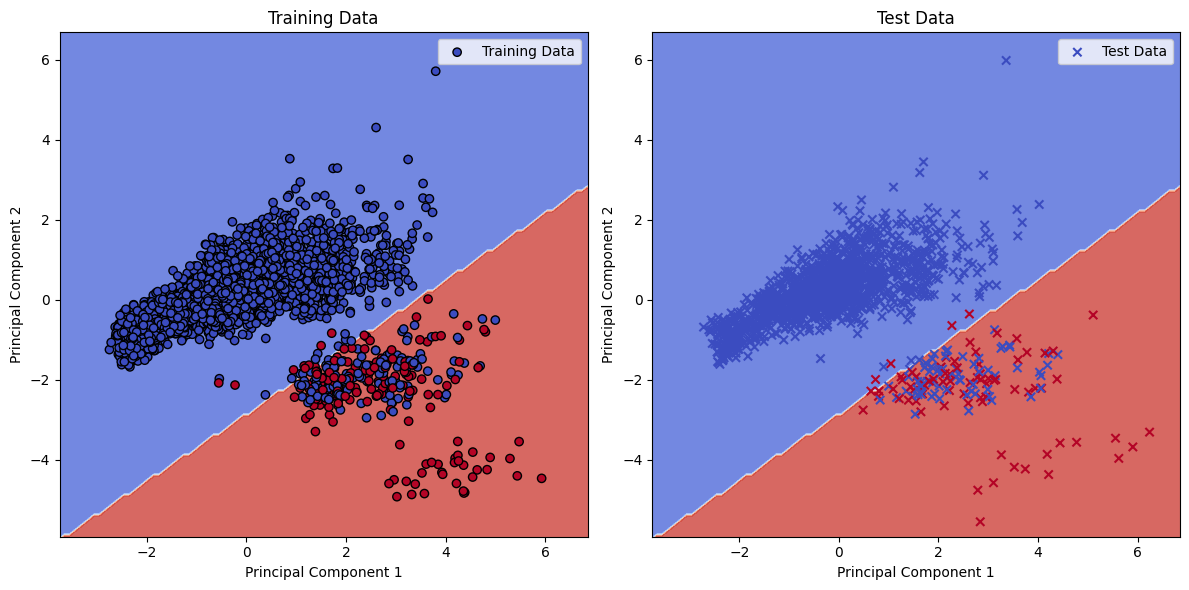

In [88]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = perceptron_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
data = [(X_train_2d, y_train, 'Training Data', 'o', ax[0]), (X_test_2d, y_test, 'Test Data', 'x', ax[1])]

for X_data, y_data, title, marker, axis in data:
    axis.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    axis.scatter(X_data[:, 0], X_data[:, 1], c=y_data, cmap=plt.cm.coolwarm, edgecolors='k', marker=marker, label=title)
    axis.set_title(title)
    axis.set_xlabel('Principal Component 1')
    axis.set_ylabel('Principal Component 2')
    axis.legend()

plt.tight_layout()
plt.show()


from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)  
X_test_2d = pca.transform(X_test)  

print("Transformed training data shape:", X_train_2d.shape)
print("Transformed test data shape:", X_test_2d.shape)

perceptron_clf.fit(X_train_2d, y_train)

y_train_pred_2d = perceptron_clf.predict(X_train_2d)
y_test_pred_2d = perceptron_clf.predict(X_test_2d)

train_accuracy_2d = accuracy_score(y_train, y_train_pred_2d)
test_accuracy_2d = accuracy_score(y_test, y_test_pred_2d)

print("PCA - Training Accuracy: {:.4f}".format(train_accuracy_2d))
print("PCA - Test Accuracy: {:.4f}".format(test_accuracy_2d))


regression에서는 Linear Regression, Polynomial Regression, Ridge Regression (L2 Regularization), LASSO, K-MEANS을 사용하여 회귀 분석 수행